In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks/LABS/")

Mounted at /content/gdrive


In [2]:
from skimage.io import imread,imsave,imshow
import numpy as np
from skimage import img_as_ubyte
from copy import deepcopy
from skimage.color import rgb2gray
%matplotlib inline

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


(85, 219)


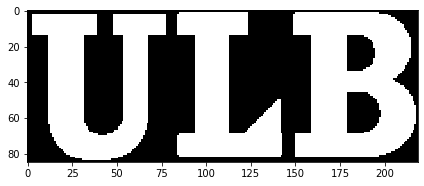

In [3]:
# Open image
watermark = imread('watermark.png')
watermark = np.asarray(watermark)
#watermark = 255-watermark
imshow(watermark)
wat_shp = watermark.shape 
print(wat_shp)

(900, 1200, 3)
75


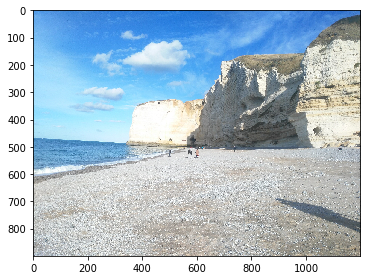

In [4]:
# Open image
im = imread('etretat.jpg')
#im = img_as_ubyte(imread("etretat.jpg", as_gray=True))
#im = np.asarray(im[:,:,1])
imshow(im)
print((im.shape))

print(im[:,:,0][0][0])

# Location

In [5]:
# User settings
LOC = (400,500) # LOCATION OF WATERMARK - TOP LEFT CORNER

# RESIZE IMAGE

In [6]:
def resize_image(im, size):
  resized_image = np.zeros((im.shape[0]*size, im.shape[1]*size))
  for i in range(0, len(resized_image), size):
    for j in range(0, len(resized_image[1]), size):
      for k in range(size):
        for l in range(size):
          resized_image[i+k][j+l] = im[i//size][j//size]
  return resized_image

# Determine if dark or ligth based

In [7]:
import cv2
def getBrightness(image):
    # RGB to LAB (lightness, a* and b* for the four unique colors of human vision: red, green, blue, and yellow (wiki))
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize
    L = L/np.max(L)
    # thresholding
    return np.mean(L) > 0.5

In [8]:
region = im[LOC[0]:LOC[0]+wat_shp[0], LOC[1]:LOC[1]+wat_shp[1]]
grayscale = rgb2gray(region)
if getBrightness(region): # np.mean(grayscale) < 127
  print("take the light based")
else:
  print("take the dark based")

take the light based


# Dark based

In [9]:
from ipywidgets import interact
import matplotlib.pyplot as plt
@interact(transparency=(0.0, 1.0), size=(1,5))
def addWatermark(transparency, size):
  res = deepcopy(im)

  _watermark = resize_image(watermark, size)
  _wat_shp = _watermark.shape
  temp = res[LOC[0]:LOC[0]+_wat_shp[0], LOC[1]:LOC[1]+_wat_shp[1]]


  wat_r = deepcopy(_watermark)
  wat_g = deepcopy(_watermark)
  wat_b = deepcopy(_watermark)
  value_R = (temp[:,:,0].max())*transparency
  value_G = (temp[:,:,1].max())*transparency
  value_B = (temp[:,:,2].max())*transparency

  wat_r[wat_r==255] = value_R
  wat_g[wat_g==255] = value_G
  wat_b[wat_b==255] = value_B

  watermark_rgb = np.array([wat_r, wat_g, wat_b])

  for c in range(3):
    for i in range(_wat_shp[0]):
      for j in range(_wat_shp[1]):
        base = res[:,:,c][LOC[0]+i][LOC[1]+j]
        val = int(base) - np.rint(watermark_rgb[c][i][j])
        res[:,:,c][LOC[0]+i][LOC[1]+j] = max(val, 0)
  
  plt.figure(figsize=(20,20))
  plt.subplot(1,2,1)
  plt.imshow(res)
  plt.subplot(1,2,2)
  plt.imshow(res[LOC[0]:LOC[0]+_wat_shp[0], LOC[1]:LOC[1]+_wat_shp[1]])
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='transparency', max=1.0), IntSlider(value=3, descript…

# Light based

In [10]:
from ipywidgets import interact
import matplotlib.pyplot as plt
@interact(transparency=(0.0, 1.0))
def addWatermark(transparency):
  res = deepcopy(im)

  temp = res[LOC[0]:LOC[0]+wat_shp[0], LOC[1]:LOC[1]+wat_shp[1]]

  wat_r = deepcopy(watermark)
  wat_g = deepcopy(watermark)
  wat_b = deepcopy(watermark)
  value_R = (255 - temp[:,:,0].min())*transparency
  value_G = (255 - temp[:,:,1].min())*transparency
  value_B = (255 - temp[:,:,2].min())*transparency

  wat_r[wat_r==255] = value_R
  wat_g[wat_g==255] = value_G
  wat_b[wat_b==255] = value_B

  watermark_rgb = np.array([wat_r, wat_g, wat_b])

  for c in range(3):
    for i in range(wat_shp[0]):
      for j in range(wat_shp[1]):
        base = res[:,:,c][LOC[0]+i][LOC[1]+j]
        val = int(base) + np.rint(watermark_rgb[c][i][j])
        res[:,:,c][LOC[0]+i][LOC[1]+j] = min(val, 255)
  
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(res)
  plt.subplot(1,2,2)
  plt.imshow(res[LOC[0]:LOC[0]+wat_shp[0], LOC[1]:LOC[1]+wat_shp[1]])
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='transparency', max=1.0), Output()), _dom_classes=('w…